## ECE495 In-class Exercise 5: Egg Hunt

In this exercise, you will:
- Find 10 eggs
- Work together as a group to piece together the snippets of code provided in the eggs AND determine which neuron to probe and plot to get the correct output
- _Note: one egg contains a snippet of code that is NOT NEEDED!_

The main concepts reviewed in this egg hunt are:
- Neuron transformations to implement an easy function
- Neuron dynamics to implement an integrator
- Inhibition by means of a "control" node (much easier than path planning!) that turns off outputs at given times ([example code here](https://www.nengo.ai/nengo/examples/advanced/inhibitory-gating.html))
- Appropriate instances in which to code within the Nengo model

Why??
- To remind ourselves of how neurons work after a weeklong break
- To have a little fun before we dive back into the hard stuff

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
  
If you are using your virtual environment, when you run this section you should see that you are using TensorFlow version 2.10.1.
  
Import TensorFlow and other libraries into your program to get started:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise

#### Put the code in the correct order

Remember, one egg isn't needed!

In [49]:
model = nengo.Network(label="Egghunt")


def abs_val(x):
    return np.abs(x)


n_neurons = 30
tau = 0.1
with model:
    inp = nengo.Node(lambda t: np.cos(3 * t))
    inhib = nengo.Node(Piecewise({0: 0, 2.5: 1, 5: 0, 7.5: 1, 10: 0, 12.5: 1}))

    integrator_neuron = nengo.Ensemble(n_neurons, dimensions=1)
    function_neuron = nengo.Ensemble(n_neurons, dimensions=1)

    nengo.Connection(inp, integrator_neuron, transform=[[tau]], synapse=tau)
    nengo.Connection(integrator_neuron, function_neuron, function=abs_val)

    nengo.Connection(integrator_neuron, integrator_neuron, transform=[[1]], synapse=tau)
    nengo.Connection(inhib, integrator_neuron.neurons, transform=[[-2.5]] * n_neurons)

    # nengo.Connection(inp, function_neuron, function=abs_val)
    # nengo.Connection(function_neuron, integrator_neuron, function=abs_val, transform=[[tau]], synapse=tau)

    sin_probe = nengo.Probe(inp)
    inhib_probe = nengo.Probe(inhib)
    integrator_probe = nengo.Probe(integrator_neuron, synapse=0.01)
    function_probe = nengo.Probe(function_neuron, synapse=0.01)

    with nengo.Simulator(model) as sim:
        sim.run(15)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

#### Plot the outputs!

Be sure to plot the correct probe to get the right output.

Make sure your plot matches that of your instructors!

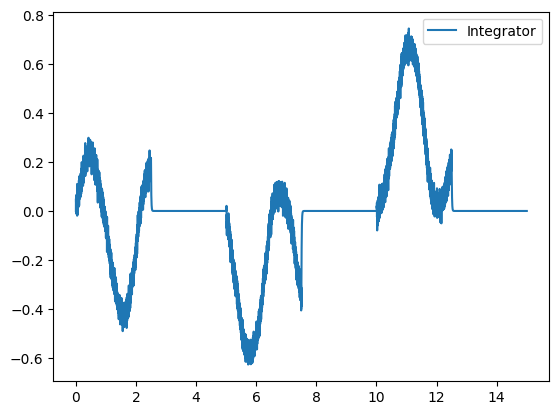

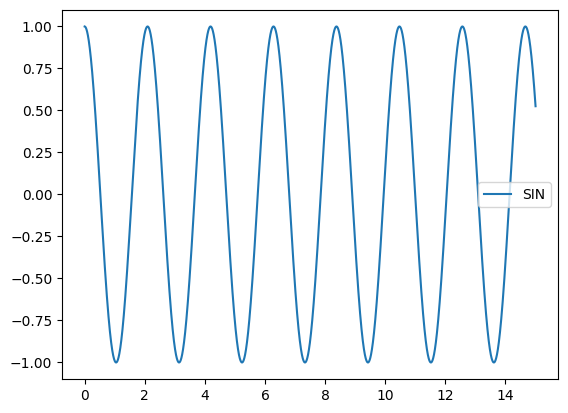

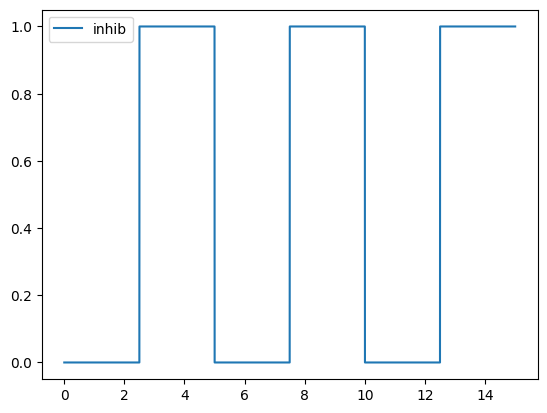

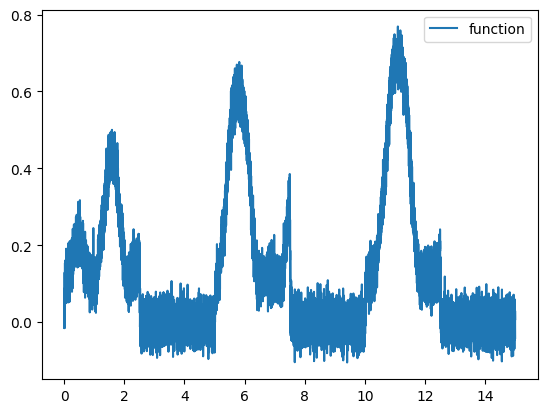

In [50]:
plt.figure()
plt.plot(sim.trange(), sim.data[integrator_probe], label="Integrator")
plt.legend()
plt.figure()
plt.plot(sim.trange(), sim.data[sin_probe], label="SIN")
plt.legend()
plt.figure()
plt.plot(sim.trange(), sim.data[inhib_probe], label="inhib")
plt.legend()
plt.figure()
plt.plot(sim.trange(), sim.data[function_probe], label="function")
plt.legend()

### Explain why you got rid of the piece of code you chose to eliminate
Be sure to explain this in terms of _why_ it would have changed your results. Make your response concise but technical!

The "decoy egg" code reversed the order of the function and integrator neurons. When using it instead of the correct code, the function neuron gets the absolute value of the input and sends it to the integrator neuron instead of the input being sent to the integrator and then to the funcion neuron. The output of the function neuron therefore doesn't exemplify the inhibition from the control node that we were looking for and it also isn't receiving from the integrator as intended. 